# 120 years of Olympic history: athletes and results

## About Dataset

## Context

This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. I scraped this data from www.sports-reference.com in May 2018. The R code I used to scrape and wrangle the data is on GitHub. I recommend checking my kernel before starting your own analysis.

Note that the Winter and Summer Games were held in the same year up until 1992. After that, they staggered them such that Winter Games occur on a four year cycle starting with 1994, then Summer in 1996, then Winter in 1998, and so on. A common mistake people make when analyzing this data is to assume that the Summer and Winter Games have always been staggered.

In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load dataset

athletes = pd.read_csv("athlete_events.csv")

In [3]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# Column Info

Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are:

	ID - Unique number for each athlete

	Name - Athlete's name

	Sex - M or F

	Age - Integer

	Height - In centimeters

	Weight - In kilograms

	Team - Team name

	NOC - National Olympic Committee 3-letter code

	Games - Year and season

	Year - Integer

	Season - Summer or Winter

	City - Host city

	Sport - Sport

	Event - Event

	Medal - Gold, Silver, Bronze, or NA

In [4]:
#loading regions dataset
region = pd.read_csv("noc_regions.csv")

In [5]:
region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


# Column Info of region dataframe


	NOC (National Olympic Committee 3 letter code)

	Country name (matches with regions in map_data("world"))

	Notes

In [6]:
#Merging dataframes and creating new

new_athletes= athletes.merge(region, how="left", on="NOC")
#NoC is common column in both the dataset and i'm going to use it for merging both the dataset.
new_athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [7]:
#checking the dimensionality
new_athletes.shape

(271116, 17)

In [8]:
#Checking column names
new_athletes.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

In [9]:
#Renaming columns in same manner
new_athletes.rename(columns={"region":"Region","notes":"Notes"},inplace=True)

In [10]:
new_athletes.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN


In [11]:
#dataset info
new_athletes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [12]:
#Checking duplicates
new_athletes.duplicated().sum()

1385

In [13]:
#dropping duplicates
new_athletes.drop_duplicates(inplace=True)

In [14]:
#Descriptive stats
new_athletes.describe()

,ID,Age,Height,Weight,Year
count,269731.000000,260416.000000,210917.000000,208204.000000,269731.000000
mean,68264.949591,25.454776,175.338953,70.701778,1978.623073
std,39026.253843,6.163869,10.518507,14.349027,29.752055
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34655.500000,21.000000,168.000000,60.000000,1960.000000
50%,68233.000000,24.000000,175.000000,70.000000,1988.000000
75%,102111.000000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


<AxesSubplot:>

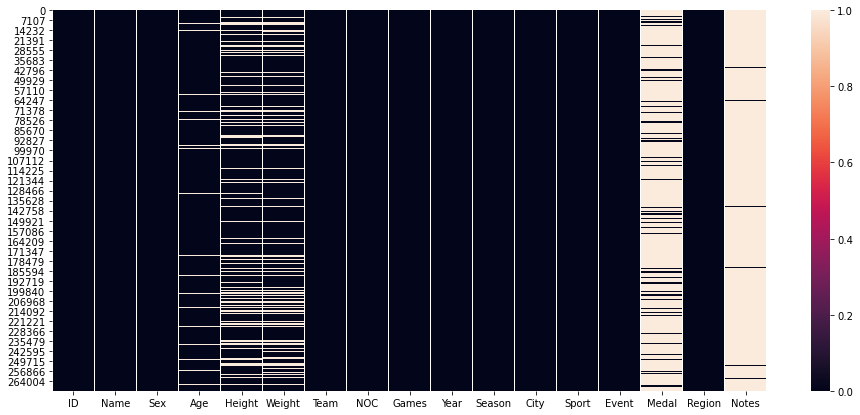

In [15]:
#heatmap for missing values
plt.figure(figsize=(16,7))
sns.heatmap(new_athletes.isnull())

In [16]:
new_athletes.isnull().sum()

ID             0
Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
Region       370
Notes     264696
dtype: int64

In [17]:
#Columns which consists NaN values
new_athletes.columns[new_athletes.isnull().any()].tolist()

['Age', 'Height', 'Weight', 'Medal', 'Region', 'Notes']

In [18]:
#Columns having NaN
new_athletes.loc[:, new_athletes.isnull().any()]

,Age,Height,Weight,Medal,Region,Notes
0,24.0,180.0,80.0,NaN,China,NaN
1,23.0,170.0,60.0,NaN,China,NaN
2,24.0,NaN,NaN,NaN,Denmark,NaN
3,34.0,NaN,NaN,Gold,Denmark,NaN
4,21.0,185.0,82.0,NaN,Netherlands,NaN
...,...,...,...,...,...,...
271111,29.0,179.0,89.0,NaN,Poland,NaN
271112,27.0,176.0,59.0,NaN,Poland,NaN
271113,27.0,176.0,59.0,NaN,Poland,NaN
271114,30.0,185.0,96.0,NaN,Poland,NaN


## Finding data of particular teams in different ways

In [19]:
#Indian athletes details

new_athletes.query('Team=="India"')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264139,132177,Mohammad Anas Yahiya,M,21.0,177.0,69.0,India,IND,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 4 x 400 metres Relay,NaN,India,NaN
265876,133029,"Thyadathuvilla Chandrapillai ""T. C."" Yohannan",M,29.0,174.0,62.0,India,IND,1976 Summer,1976,Summer,Montreal,Athletics,Athletics Men's Long Jump,NaN,India,NaN
266934,133554,Sayed Muhammad Yusuf,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN
270912,135480,Geeta Zutshi,F,23.0,167.0,51.0,India,IND,1980 Summer,1980,Summer,Moskva,Athletics,Athletics Women's 800 metres,NaN,India,NaN


In [20]:
#Japanese athletes

new_athletes[new_athletes["Team"]=="Japan"]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
625,362,Isao Ko Abe,M,24.0,177.0,75.0,Japan,JPN,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Hammer Throw,NaN,Japan,NaN
629,363,Kazumi Abe,M,28.0,178.0,67.0,Japan,JPN,1976 Winter,1976,Winter,Innsbruck,Bobsleigh,Bobsleigh Men's Four,NaN,Japan,NaN
630,364,Kazuo Abe,M,25.0,166.0,69.0,Japan,JPN,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Lightweight, Freestyle",NaN,Japan,NaN
631,365,Kinya Abe,M,23.0,168.0,68.0,Japan,JPN,1992 Summer,1992,Summer,Barcelona,Fencing,"Fencing Men's Foil, Individual",NaN,Japan,NaN
632,366,Kiyoshi Abe,M,25.0,167.0,62.0,Japan,JPN,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN,Japan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266953,133565,Tsuneya Yuzaki,M,19.0,174.0,67.0,Japan,JPN,1960 Summer,1960,Summer,Roma,Hockey,Hockey Men's Hockey,NaN,Japan,NaN
266954,133565,Tsuneya Yuzaki,M,23.0,174.0,67.0,Japan,JPN,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,NaN,Japan,NaN
266955,133565,Tsuneya Yuzaki,M,27.0,174.0,67.0,Japan,JPN,1968 Summer,1968,Summer,Mexico City,Hockey,Hockey Men's Hockey,NaN,Japan,NaN
266957,133566,Ryo Yuzawa,M,27.0,175.0,76.0,Japan,JPN,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Men's Singles,NaN,Japan,NaN


In [21]:
#USA athletes

new_athletes[new_athletes["NOC"].str.contains("USA")]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA,NaN
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN,USA,NaN
12,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN,USA,NaN
13,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN,USA,NaN
14,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN,USA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270850,135458,Rami Zur,M,27.0,175.0,77.0,United States,USA,2004 Summer,2004,Summer,Athina,Canoeing,"Canoeing Men's Kayak Doubles, 500 metres",NaN,USA,NaN
270851,135458,Rami Zur,M,31.0,175.0,77.0,United States,USA,2008 Summer,2008,Summer,Beijing,Canoeing,"Canoeing Men's Kayak Singles, 500 metres",NaN,USA,NaN
270852,135458,Rami Zur,M,31.0,175.0,77.0,United States,USA,2008 Summer,2008,Summer,Beijing,Canoeing,"Canoeing Men's Kayak Singles, 1,000 metres",NaN,USA,NaN
271044,135543,"Victor Andrew ""Vic"" Zwolak",M,25.0,175.0,64.0,United States,USA,1964 Summer,1964,Summer,Tokyo,Athletics,"Athletics Men's 3,000 metres Steeplechase",NaN,USA,NaN


In [22]:
#Russian athlete

new_athletes[new_athletes["NOC"].isin(["RUS"])]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
163,67,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.0,80.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver,Russia,NaN
164,67,Mariya Vasilyevna Abakumova (-Tarabina),F,26.0,179.0,80.0,Russia,RUS,2012 Summer,2012,Summer,London,Athletics,Athletics Women's Javelin Throw,NaN,Russia,NaN
195,90,Tamila Rashidovna Abasova,F,21.0,163.0,60.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Cycling,Cycling Women's Sprint,Silver,Russia,NaN
196,90,Tamila Rashidovna Abasova,F,21.0,163.0,60.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Cycling,Cycling Women's 500 metres Time Trial,NaN,Russia,NaN
615,356,Adlan Aliyevich Abdurashidov,M,26.0,172.0,60.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Lightweight,NaN,Russia,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,Russia,NaN
271103,135563,Olesya Nikolayevna Zykina,F,23.0,171.0,64.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's 4 x 400 metres Relay,Silver,Russia,NaN
271104,135564,Yevgeny Aleksandrovich Zykov,M,22.0,172.0,65.0,Russia-1,RUS,2002 Winter,2002,Winter,Salt Lake City,Luge,Luge Mixed (Men)'s Doubles,NaN,Russia,NaN
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN


# Plotting for number of athletes participated for a team from 1896

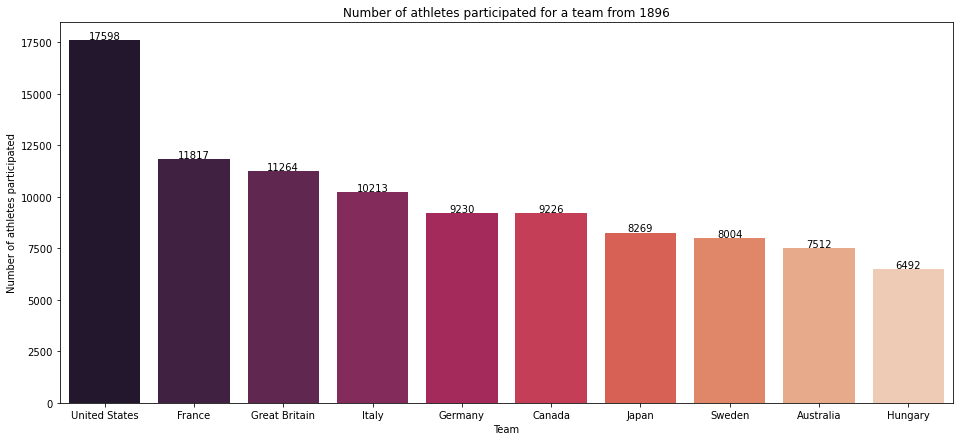

United States    17598
France           11817
Great Britain    11264
Italy            10213
Germany           9230
Canada            9226
Japan             8269
Sweden            8004
Australia         7512
Hungary           6492
Name: Team, dtype: int64

In [23]:
#Top 10 countries participating from 1896 and number of athletes participated
plt.figure(figsize=(16,7))

fig=sns.countplot(x = new_athletes["Team"], order=new_athletes["Team"].value_counts().index[:10], palette='rocket')
#for showing value count above the bars
for p in fig.patches:
    fig.annotate(format(p.get_height(),".0f"),(p.get_x()+p.get_width()/2.,p.get_height()),
                 ha="center", va="center",xytext=(0,4), textcoords="offset points")
    
plt.title("Number of athletes participated for a team from 1896")
plt.ylabel("Number of athletes participated")
plt.show()
new_athletes["Team"].value_counts().sort_values(ascending=False).head(10)

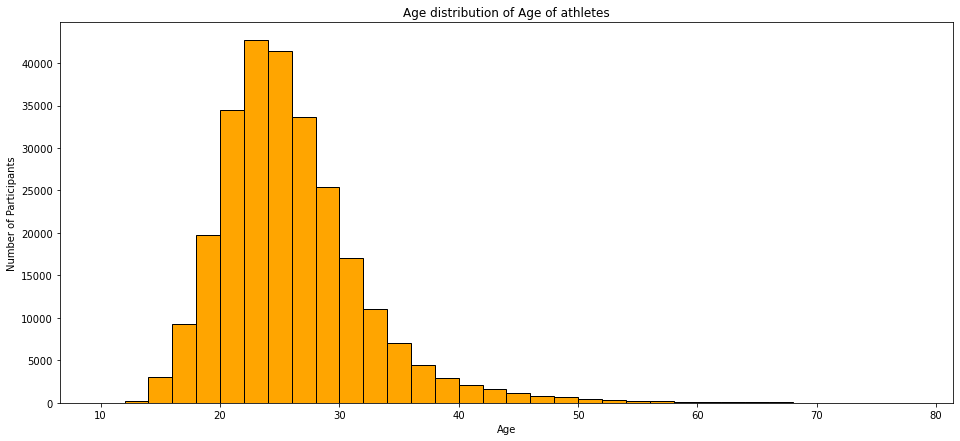

In [24]:
#Distribution of Age of athletes

plt.figure(figsize=(16,7))
plt.title("Age distribution of Age of athletes")
plt.xlabel("Age")
plt.ylabel("Number of Participants")
plt.hist(new_athletes["Age"], bins=np.arange(10,80,2), color="orange", edgecolor="black")
plt.show()

Most of the athletes age lies between 18 to 35 years.

# Sex ratio of Male and Female participated from 1896

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


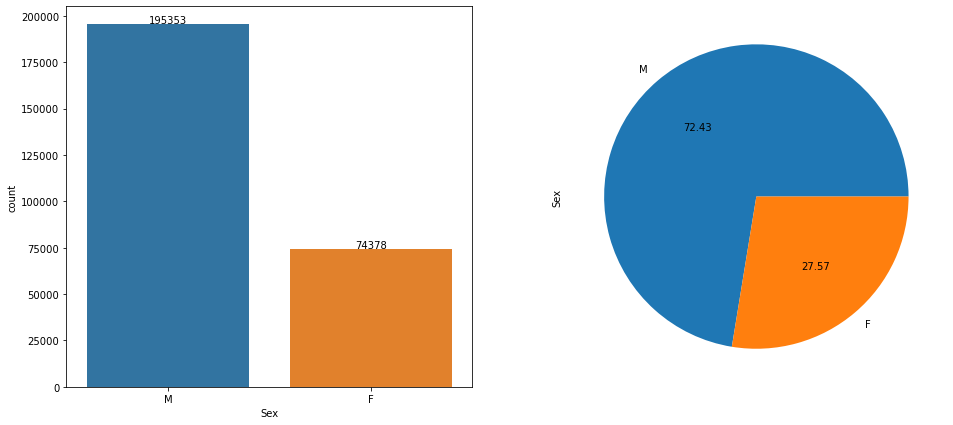

M    195353
F     74378
Name: Sex, dtype: int64

In [25]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
fig =sns.countplot(new_athletes["Sex"])
#for showing value count above the bars
for p in fig.patches:
    fig.annotate(format(p.get_height(),".0f"),(p.get_x()+p.get_width()/2.,p.get_height()),
                 ha="center", va="center",xytext=(0,4), textcoords="offset points")

plt.subplot(1,2,2)
new_athletes["Sex"].value_counts().plot.pie(autopct="%.2f")
plt.show()
new_athletes["Sex"].value_counts()

# Medals

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


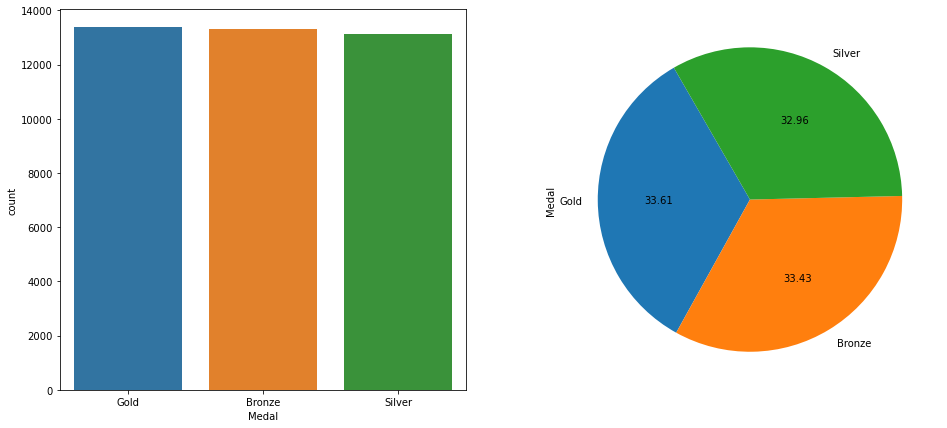

Gold      13369
Bronze    13295
Silver    13108
Name: Medal, dtype: int64

In [26]:
#Total Medals

plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.countplot(new_athletes["Medal"])

plt.subplot(1,2,2)
new_athletes["Medal"].value_counts().plot.pie(autopct="%.2f",startangle=120)
plt.show()
new_athletes["Medal"].value_counts()

# Visualize the medal distribution for the top 10 countries

In [27]:
#Creating dummies for Medal column
pd.get_dummies(new_athletes["Medal"])

#Concating with new_athletes dataframe
olympics=pd.concat([new_athletes,pd.get_dummies(new_athletes["Medal"])], axis=1)
olympics

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,Poland,NaN,0,0,0
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,Poland,NaN,0,0,0
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,Poland,NaN,0,0,0
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,Poland,NaN,0,0,0


In [28]:
#Top 10 countries winning medals
olympics.groupby("Region").sum()[["Gold","Silver","Bronze"]].sort_values("Gold", ascending=False).head(25)

,Gold,Silver,Bronze
Region,,,
USA,2638.0,1641.0,1358.0
Russia,1599.0,1170.0,1178.0
Germany,1301.0,1195.0,1260.0
UK,677.0,739.0,651.0
Italy,575.0,531.0,531.0
France,499.0,602.0,666.0
Sweden,479.0,522.0,535.0
Canada,463.0,438.0,451.0
Hungary,432.0,332.0,371.0


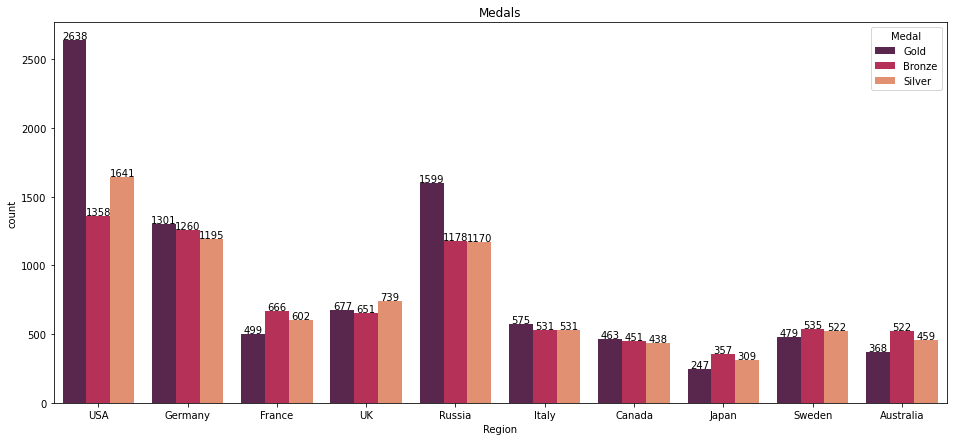

In [29]:
#Top 10 countries winning Medals in olympics
plt.figure(figsize=(16,7))

fig=sns.countplot(x = olympics["Region"], order=olympics["Region"].value_counts().index[:10],hue=olympics["Medal"],
                  palette='rocket')

#for showing value count above the bars
for p in fig.patches:
    fig.annotate(format(p.get_height(),".0f"),(p.get_x()+p.get_width()/2.,p.get_height()),
                 ha="center", va="center",xytext=(0,4), textcoords="offset points")
plt.title("Medals")
plt.show()

If we check the above data from wikipedia "All Time Olympics Games Medal Table" (https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table). It is clearly evident that the countplot which we plotted is incorrect because what they have done in the dataset is in the team event the medal which get is counted on the basis of number of player participated in the team event. For e.g. if any team won gold in hockey event then the gold medal counted are all the athletes participated in the hockey event, but actually when it is on the basis of team it is counted as 1.

In [30]:
#olympics.groupby("NOC").sum()[["Gold","Silver","Bronze"]].sort_values("Gold", ascending=False).head(25)

#If we check number of gold medals won by India in olympic is 138 which is in correct.
olympics[(olympics["Region"]=="India") & (olympics["Medal"]=="Gold")]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes,Bronze,Gold,Silver
4732,2699,Shaukat Ali,M,30.0,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
4736,2703,Syed Mushtaq Ali,M,22.0,165.0,61.0,India,IND,1964 Summer,1964,Summer,Tokyo,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
5032,2864,Richard James Allen,M,25.0,172.0,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
5033,2864,Richard James Allen,M,30.0,172.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
5034,2864,Richard James Allen,M,34.0,172.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233749,117232,Dung Dung Sylvanus,M,31.0,160.0,62.0,India,IND,1980 Summer,1980,Summer,Moskva,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
236445,118553,Carlyle Carrol Tapsell,M,23.0,182.0,NaN,India,IND,1932 Summer,1932,Summer,Los Angeles,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
236446,118553,Carlyle Carrol Tapsell,M,27.0,182.0,NaN,India,IND,1936 Summer,1936,Summer,Berlin,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0
250689,125560,"Max ""Maxie"" Vaz",M,NaN,NaN,NaN,India,IND,1948 Summer,1948,Summer,London,Hockey,Hockey Men's Hockey,Gold,India,NaN,0,1,0


From the above dataframe we can clearly see that on the basis of columns 'Team', 'NOC', 'Games','Year', 'Season', 'City', 'Sport', 'Event'and "Medal that they have include all the athletes participated in a event.And when we plot the countplot for the medals it includes all the athletes which is incorrect.**So we need to plot again by removing duplicates on the basis of following columns 'Team', 'NOC', 'Games','Year', 'Season', 'City', 'Sport', 'Event'and 'Medal'.**

In [31]:
medal_tally=olympics.drop_duplicates(subset=['Team', 'NOC', 'Games','Year', 'Season', 'City', 'Sport', 'Event','Medal'])

In [32]:
medal_tally.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN,0,0,0


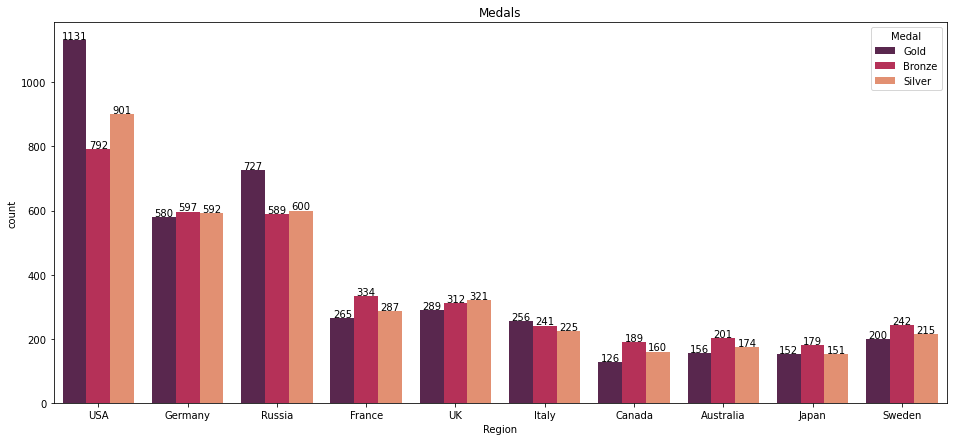

In [33]:
#Top 10 winning Medals countries in olympics
plt.figure(figsize=(16,7))

fig=sns.countplot(x = medal_tally["Region"], order=medal_tally["Region"].value_counts().index[:10],hue=medal_tally["Medal"],
                  palette='rocket')

#for showing value count above the bars
for p in fig.patches:
    fig.annotate(format(p.get_height(),".0f"),(p.get_x()+p.get_width()/2.,p.get_height()),
                 ha="center", va="center",xytext=(0,4), textcoords="offset points")
plt.title("Medals")
plt.show()

# Interactive plots

In [34]:
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True) 

In [35]:
data = dict(type='choropleth',
            colorscale = 'Viridis',
            reversescale = True,
            locations = medal_tally['Region'],
            z = medal_tally['Gold'],
            locationmode = "country names",
            text = medal_tally['Region'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"Gold Medals won by each country"}
            ) 

In [36]:
layout = dict(title = 'Country wise Gold Medals',
              geo = dict(
                         showlakes = True,
                         projection = {'type':'natural earth'},
                         lakecolor = 'rgb(85,173,240)')
             )

In [ ]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

In [ ]:
medal_tally=medal_tally.groupby("Region").sum()[["Gold","Silver","Bronze"]].sort_values("Gold", ascending=False).reset_index()

In [ ]:
medal_tally[medal_tally["Region"]=="India"]

In [ ]:
medal_tally["Total Medal"]=medal_tally["Gold"].astype(int)+medal_tally["Silver"].astype(int)+medal_tally["Bronze"].astype(int)

In [ ]:
medal_tally

In [ ]:
#Top 10 winning Medals in olympics
plt.figure(figsize=(16,7))

fig=sns.barplot(x = medal_tally["Region"], y=medal_tally["Total Medal"],order=medal_tally["Region"].head(10),
                  palette='rocket')

#for showing value count above the bars
for p in fig.patches:
    fig.annotate(format(p.get_height(),".0f"),(p.get_x()+p.get_width()/2.,p.get_height()),
                 ha="center", va="center",xytext=(0,4), textcoords="offset points")
plt.title("Medals")
plt.show()

In [ ]:
data = dict(type='choropleth',
            colorscale = 'turbo',
            reversescale = True,
            locations = medal_tally['Region'],
            z = medal_tally['Total Medal'],
            locationmode = "country names",
            text = medal_tally['Region'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"Total Medals won by each country"}
            ) 

In [ ]:
layout = dict(title = 'Country wise Total Medals',
              geo = dict(
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
             )

In [ ]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

In [ ]:
#Total number of female participated each year in olympic

womenOlympics = olympics[(olympics["Sex"]=="F") & (olympics["Season"]=="Summer")]

In [ ]:
plt.figure(figsize=(16,7))
fig = sns.countplot(x="Year",data=womenOlympics, palette="rocket")

#for showing value count above the bars
for p in fig.patches:
    fig.annotate(format(p.get_height(),".0f"),(p.get_x()+p.get_width()/2.,p.get_height()),
                 ha="center", va="center",xytext=(0,4), textcoords="offset points")
plt.title("Women Participant Each year")
plt.show()

women_participated_yearwise=womenOlympics.groupby("Year")["Sex"].value_counts()
women_participated_yearwise

In [ ]:
#line plot for women participation in olympics summer
plt.figure(figsize=(16,7))
women_participated_yearwise.loc[:,"F"].plot()

# Number of olympic Events

In [ ]:
olympics["Event"].unique().shape

# Number of cities host olympic Events

In [ ]:
olympics["City"].nunique()

# Number of athletes participated in olympics

In [ ]:
olympics["Name"].nunique()

# Number of participating countries

In [ ]:
olympics["Region"].nunique()

# Winter Olympic Dataset

In [ ]:
winter_olympics = olympics[olympics["Season"]=="Winter"]
winter_olympics.head()

In [ ]:
winter_olympics.shape

In [ ]:
#Winter olympic sports played
winter_olympics.Sport.unique()

In [ ]:
winter_olympics["Year"].unique()

In [ ]:
winter_olympics["Year"].nunique()

In [ ]:
winter_olympics["City"].unique()

In [ ]:
winter_olympics["City"].nunique()

# Summer Olympics Dataset

In [ ]:
summer_olympics = olympics[olympics["Season"]=="Summer"]
summer_olympics.head()

In [ ]:
summer_olympics.shape

In [ ]:
#Sports played in Summer Olympics
summer_olympics.Sport.unique()

In [ ]:
summer_olympics["Year"].unique().shape

# Gold Medal

In [ ]:
#Gold Medals

gold_medals=olympics[(olympics["Medal"]=="Gold")]
gold_medals.head()

In [ ]:
# take values that are different from NaN

gold_medals=gold_medals[np.isfinite(gold_medals["Age"])]

In [ ]:
#To find the athletes win gold above 50 age

gold_medals["ID"][gold_medals["Age"]>50].count()

In [ ]:
# to find the sporting events in which athletes won gold medal above age 60

sporting_events = gold_medals["Sport"][gold_medals["Age"]>50]
sporting_events

In [ ]:
plt.figure(figsize=(16,5))
sns.countplot(sporting_events)
plt.title("Gold Medal sport events for athletes above age 60")
plt.show()

# Who won the most  gold medals

In [ ]:
medals = olympics.groupby(['Name', 'Medal'])['Sport'].count().reset_index().sort_values(by='Sport', ascending=False)

In [ ]:
medals

# Who won the most medals

In [ ]:
medals1 = olympics.groupby(['Name', 'Sport',"Sex"])['Medal'].count().reset_index().sort_values(by='Medal', ascending=False)

In [ ]:
medals1

# Rio Olympic

In [ ]:
#Country which won most gold medals in Rio olympic
max_year=olympics["Year"].max()
print(max_year)

team_names = olympics[(olympics["Year"]==max_year) & (olympics["Medal"]=="Gold")]["Team"]
team_names.value_counts().head()

In [ ]:
plt.figure(figsize=(16,7))
sns.barplot(x=team_names.value_counts().head(20),y=team_names.value_counts().head(20).index)